# Quantum Phase Estimation Implementation

Rory Schadler, Phyo Kyi Pyaw
Physics 75  

Lab 3 

In [1]:
from qiskit.visualization import plot_histogram
from qiskit import *
import numpy as np

In [2]:
def prepare_register(n, angle):
    qc = QuantumCircuit(n+1,n)
    # |1> is the eigenstate of the controlled unitary I've implemented, I think this might change for a general unitary transformation
    qc.x(n)
    for i in range(n):
        # prepare ancilla qubits
        qc.h(i)
        # apply the controlled unitary 2^i times 
        apply_unitary(qc, angle, i, n, 2**i)
    qc.barrier()
    return qc

In [3]:
def apply_unitary(qc, angle, ctrl, psi, reps):
    for i in range(reps):
        qc.cu1(2*angle, ctrl, psi)

In [4]:
def phase_estimation(n, qc):
    for i in range(n-1,-1,-1): # [n-1, n-2, ..., 0]
        qc.h(i)
        # apply controlled rotation to other bits with correct scaling
        for j in range(i-1,-1,-1):
            qc.cu1(-np.pi/(2**(i - j)), i, j)

In [5]:
def measure(n, qc):
    for i in range(n):
        qc.measure(i,n-i-1) # swap order so qiskit returns correct bitstring

In [6]:
# Set number of qubits (accuracy of estimation) and desired phase angle to estimate
n = 5
angle = np.pi/8

In [7]:
# Prepare circuit
qc = prepare_register(n, angle)
phase_estimation(n, qc)
measure(n, qc)
# qc.draw(output='mpl')

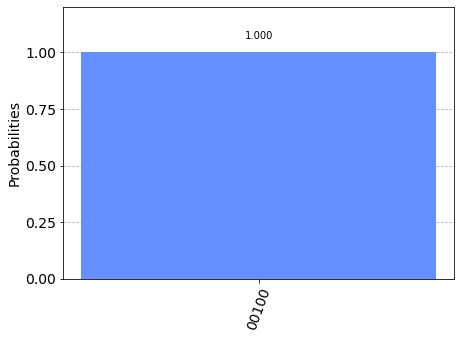

In [8]:
# Run circuit
qasm_sim = Aer.get_backend('qasm_simulator')
qobj = assemble(qc, shots=2048)
results = qasm_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

In [9]:
import qiskit.tools.jupyter
%qiskit_version_table